In [3]:
#Import useful packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load the data set
df = pd.read_csv("who_data.csv")
df_copy = df.copy()

In [4]:
df_copy.head(10)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

### Age Columns

In [7]:
df_copy["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

- The age column has no missing values, with  a total count of 32561, the mean is 38.58. std is 13.64, minimum age is 17 years, the median age is 37 years, while the  max age is 90 years, the dtype is float.

In [8]:
df_copy["age"].isnull().sum()

0

### WorkClass & Occupation Columns

In [9]:
df_copy["workclass"].describe()

count        32561
unique           9
top        Private
freq         22696
Name: workclass, dtype: object

In [10]:
df_copy["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df_copy["workclass"].nunique()

9

- There are 9 unique values in the dataset, but there is a unique value with " ?", let us explore the row with this unique value.

In [12]:
df_copy[(df_copy["workclass"] == ' ?')]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


- There are 1836 rows with '?' in thw workclass row, it seems that those rows with ' ? ' also have the same in occupation. Let us find out

In [13]:
df_copy["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
df_copy[(df_copy["occupation"] == ' ?')]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


- 1843 rows have ' ? ' in occupation columns.which has 9 more than the workclass. Let s check the two

df_copy[(df_copy["occupation"] == ' ?') & (df_copy["workclass"] == ' ?')]

- From the unique values in occupation, there are  no catergories for people without occupation, it seems as if those people with the unique value " ? " are those without any occupation i.e the unemployed

- let us change the ' ? ' to nan, for both occupation and workclass.

In [16]:
df_copy["workclass"].replace([' ?'], [np.nan], inplace = True)

- Now that we have converted the ' ?' . Let us explore further

In [17]:
#Sanity Check
df_copy["workclass"].isnull().sum()

1836

In [18]:
df_copy["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [22]:
df_copy["workclass"].describe()

count        30725
unique           8
top        Private
freq         22696
Name: workclass, dtype: object

In [20]:
df_copy["occupation"].replace([' ?'], [np.nan], inplace = True)

In [21]:
#Sanity Check
df_copy["occupation"].isnull().sum()

1843

- We can not conclude that those with'?' are unemployed due to the fact that they have numbers of weekly working hours, and even salary. Hence we replace them with the unknown for  both occupation and workclass. As we can not say precisely their type of occupation and work class due to the fact that some people work up to 99 hours a week, while some work for just an hour,  also some earn less than 50k dollars while others earn more, this makes it difficult to conclude their occupation and work class, hence, they will be replaced with unknown.
- we can not call them students has some already had masters degree and bachelors, also a student can not work for 99 hours a week, also we taught of replacing them with the top class in oth workclass and occupation, for occupation, the top class is prof-speciality, it is not possible for a prof- speciality tpo work for just an hour a week. This was what prompted the replacement with "Unknown"

In [23]:
#Let us fill the nan with unknown for occupation
df_copy["occupation"]=df_copy["occupation"].fillna("Unknown")

In [24]:
#Sanity Check
df_copy["occupation"].isnull().sum()

0

In [25]:
#Let us fill the nan with unknown for workclass
df_copy["workclass"]= df_copy["workclass"].fillna("Unknown")

In [26]:
df_copy["workclass"].isnull().sum()

0

- The " ?" rows changed to nan has been replaced with Unknown

### fnlwgt Columns

In [27]:
df_copy["fnlwgt"]. describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [28]:
df_copy["fnlwgt"].isnull(). sum()

0

### Education Column

In [29]:
df_copy["education"]. describe()

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

In [30]:
df_copy["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [31]:
df_copy["education"].nunique()

16

- There are 16 unique values in education with 32561 counts and HS-grad  has the top with 10501 counts

#### Education_no_of_years Column

In [32]:
df_copy["education_no_of_years"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [33]:
df_copy["education_no_of_years"].isnull().sum()

0

In [34]:
df_copy["education_no_of_years"].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education_no_of_years, dtype: float64

- The no of years of education comprises of 16 unique values  with the mean as 10.08, median as 10.000, and Std as 2.5727.

#### Marital Status Column

In [35]:
df_copy["marital_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [36]:
df_copy["marital_status"].isnull().sum()

0

In [37]:
df_copy["marital_status"].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: marital_status, dtype: object

- There are seven unique values in the marital status column with the top as Married-civ-spouse with 14976 freq

### Working hours per week

In [41]:
df_copy["working_hours_per_week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [39]:
df_copy["working_hours_per_week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: working_hours_per_week, dtype: float64

- There are 94 unique values in the column, the mean is 40.437, median is 40.000, and Std deviation 12.3474

### Relationship

In [42]:
df_copy["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [43]:
df_copy["relationship"].describe()

count        32561
unique           6
top        Husband
freq         13193
Name: relationship, dtype: object

### Race

In [44]:
df_copy["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [45]:
df_copy["race"].describe()

count      32561
unique         5
top        White
freq       27816
Name: race, dtype: object

- There are 5 unique values with white as the top having 27816 frequency

#### Sex

In [46]:
df_copy["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [47]:
df_copy["sex"].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

- There are 2 unique values, the male is has the top occurence with a freq of 21790

### Capital Gain

In [50]:
df_copy["capital_gain"].nunique()

119

In [49]:
df_copy["capital_gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

- There are 119 unique values with mean of 1077.6488, median 0.00, std 7385.29 and max of 99999

### Capital Loss

In [54]:
df_copy["capital_loss"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [52]:
df_copy["capital_loss"].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

- There are 92 unique values with mean of 87.3038, median 0.00, std 402.96 and max of 4356.0000

### Working hours per week

In [59]:
df_copy["working_hours_per_week"].nunique()

94

In [57]:
df_copy["working_hours_per_week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: working_hours_per_week, dtype: float64

- There are 94 unique values with mean of 40.43, median 40.000, std 12.34 and max of 99.0000

### Native Country

In [60]:
df_copy["native_country"].describe()

count              32561
unique                42
top        United-States
freq               29170
Name: native_country, dtype: object

In [61]:
df_copy["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [62]:
df_copy[(df_copy["native_country"] == ' ?')]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,Unknown,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


- The native country will be fill based on  their race, let us explore each ' ?' row based on race.

In [63]:
df_copy[(df_copy["native_country"] == ' ?') & (df_copy["race"] == " Asian-Pac-Islander")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
297,39,Unknown,157443,Masters,14,Married-civ-spouse,Unknown,Wife,Asian-Pac-Islander,Female,3464,0,40,?,<=50K
1158,26,Private,227332,Bachelors,13,Never-married,Transport-moving,Unmarried,Asian-Pac-Islander,Male,0,0,40,?,<=50K
1348,36,Private,153078,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,60,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29786,41,Private,169104,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
30230,20,Private,178469,HS-grad,9,Never-married,Other-service,Own-child,Asian-Pac-Islander,Female,0,0,15,?,<=50K
31701,36,Private,137421,12th,8,Never-married,Transport-moving,Not-in-family,Asian-Pac-Islander,Male,0,0,45,?,<=50K
32169,25,Private,149943,HS-grad,9,Never-married,Other-service,Other-relative,Asian-Pac-Islander,Male,4101,0,60,?,<=50K


- from the  country unique values, the following country are considered to be Asian-Pac-Islander:India
Philippines, Cambodi, Thailand, Laos, Taiwan, China, Japan, Vietnam. We will convert the '?' row to nan and then fill with any country from Asian_Pac_Islander

In [64]:
#Convert the '?' rows  to Nan

In [67]:
df_copy["native_country"].replace([' ?'], [np.nan], inplace = True)

In [68]:
#Sanity Check
df_copy[(df_copy["native_country"].isnull())]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,Unknown,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


- Hence, this has been replaced with NaN, we fill the missing value based on country from each race.

 #### Replacing missing country from Asian-Pac-Islander race with Indian

In [107]:
df_copy.loc[(df_copy["native_country"].isnull()) & (df_copy["race"] == " Asian-Pac-Islander"), "native_country"] = "Indian"

In [108]:
#Sanity check
df_copy[(df_copy["native_country"].isnull()) & (df_copy["race"] == " Asian-Pac-Islander")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary


 #### Replacing missing country from White race with England

In [71]:
df_copy[(df_copy["native_country"].isnull()) & (df_copy["race"] == " White")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,Unknown,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,NaN,<=50K
245,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,NaN,<=50K
249,45,Private,153141,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [72]:
# The null values in the native country  and race as white, will be replaced with a whitecountry from the unique values in country, England

In [79]:
df_copy.loc[(df_copy["native_country"].isnull()) & (df_copy["race"]== " White"), "native_country"] = "England"

In [80]:
#Sanity Check
df_copy[(df_copy["native_country"].isnull()) & (df_copy["race"]== " White")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary


In [81]:
df_copy[(df_copy["native_country"].isnull())]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
297,39,Unknown,157443,Masters,14,Married-civ-spouse,Unknown,Wife,Asian-Pac-Islander,Female,3464,0,40,NaN,<=50K
453,42,Private,197583,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,NaN,>50K
1026,30,Private,201624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,36,Private,137421,12th,8,Never-married,Transport-moving,Not-in-family,Asian-Pac-Islander,Male,0,0,45,NaN,<=50K
31796,31,Private,190027,HS-grad,9,Never-married,Other-service,Other-relative,Black,Female,0,0,40,NaN,<=50K
32169,25,Private,149943,HS-grad,9,Never-married,Other-service,Other-relative,Asian-Pac-Islander,Male,4101,0,60,NaN,<=50K
32232,30,Private,215441,Some-college,10,Never-married,Adm-clerical,Not-in-family,Other,Male,0,0,40,NaN,<=50K


#### Replacing missing country from Black race with the united States

In [82]:
df_copy[(df_copy["native_country"].isnull()) & (df_copy["race"] == " Black")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
453,42,Private,197583,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,NaN,>50K
1026,30,Private,201624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,NaN,<=50K
1391,40,Local-gov,289403,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,1887,40,NaN,>50K
2518,28,Private,173649,HS-grad,9,Never-married,Other-service,Own-child,Black,Female,0,0,40,NaN,<=50K
2775,49,State-gov,133917,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,1902,60,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30582,34,Private,209213,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,NaN,<=50K
31336,39,Private,175681,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,NaN,<=50K
31359,28,Private,178489,Bachelors,13,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,45,NaN,<=50K
31468,35,Private,75855,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Black,Male,7298,0,40,NaN,>50K


In [83]:
df_copy["native_country"]. unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', 'England', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [84]:
df_copy["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

- The native country doesn't have any African  country, we will replace it with the united states, due to the fact that we have black  Africa & America in the united states. 

In [89]:
df_copy.loc[(df_copy["native_country"].isnull()) & (df_copy["race"] == ' Black'), "native_country"] = 'United-States'

In [90]:
#Sanity Check
df_copy[(df_copy["native_country"].isnull()) & (df_copy["race"] == " Black")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary


In [101]:
#Checking the remaining missing values
df_copy[(df_copy["native_country"].isnull())]


,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
297,39,Unknown,157443,Masters,14,Married-civ-spouse,Unknown,Wife,Asian-Pac-Islander,Female,3464,0,40,NaN,<=50K
1158,26,Private,227332,Bachelors,13,Never-married,Transport-moving,Unmarried,Asian-Pac-Islander,Male,0,0,40,NaN,<=50K
1348,36,Private,153078,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,60,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29786,41,Private,169104,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
30230,20,Private,178469,HS-grad,9,Never-married,Other-service,Own-child,Asian-Pac-Islander,Female,0,0,15,NaN,<=50K
31701,36,Private,137421,12th,8,Never-married,Transport-moving,Not-in-family,Asian-Pac-Islander,Male,0,0,45,NaN,<=50K
32169,25,Private,149943,HS-grad,9,Never-married,Other-service,Other-relative,Asian-Pac-Islander,Male,4101,0,60,NaN,<=50K


- We do not have ideas of the race of those in others categories, hence, we fill the missing values with unknown.

In [109]:
df_copy.loc[(df_copy["native_country"].isnull()) & (df_copy["race"] == ' Other'), "native_country"] = 'Unknown'

In [110]:
#Sanity Check
df_copy[(df_copy["native_country"].isnull())]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary


- The native_country has been cleaned.

#### Salary

In [111]:
df_copy["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [112]:
df_copy["salary"].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: salary, dtype: object

- The salary has 2 unique values, the most occurred one is <=50k with number of 24720 out of 32561 

In [113]:
df_copy.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

#### DATA VISUALIZATION

In [1]:
from utils import labeled_barplot

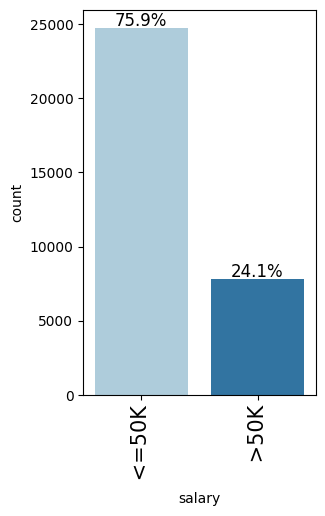

In [5]:
labeled_barplot(data =df_copy, feature ="salary" , perc = True)

- Those with income <=50k are 75.9% while those >50k are 24.1%, this is an example of imbalanced data.

In [6]:
# Let's check the value count
df_copy["salary"].value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

#### Check duplicates

In [7]:
df_copy.duplicated().sum()

24

In [8]:
df_copy.loc[df.duplicated(), :]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


#### Drop duplicates

In [9]:
df_copy = df_copy.drop_duplicates()

In [10]:
#Reset index
df_copy = df_copy. reset_index(drop = True)

In [11]:
#Sanity Check
df_copy.duplicated().sum()

0

- The duplicates has been dropped successfully

### Checking Correlation

- To check the correlation. perform label Encoding 

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Specify the target column
target_column = 'salary'

# Perform label encoding on the target column
label_encoder = LabelEncoder()
df_copy["salary"] = label_encoder.fit_transform(df_copy["salary"])

# Print the encoded data
#print(d)

In [26]:
#Let's check the correlation
#select numeric column
#num_col = [["age","fnlgwt","education_no_of_years","capital_gain", "capital_loss", "working_hours_per_week","salary"]]

In [77]:
#num_col = ["age","fnlgwt","education_no_of_years","capital_gain", "capital_loss", "working_hours_per_week","salary"]
mat_cor = df_copy.corr()

C:\Users\cetphoto\AppData\Local\Temp\ipykernel_4876\2522065516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_cor = df_copy.corr()


C:\Users\cetphoto\AppData\Local\Temp\ipykernel_4876\1435595815.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_cor = df_copy.corr()


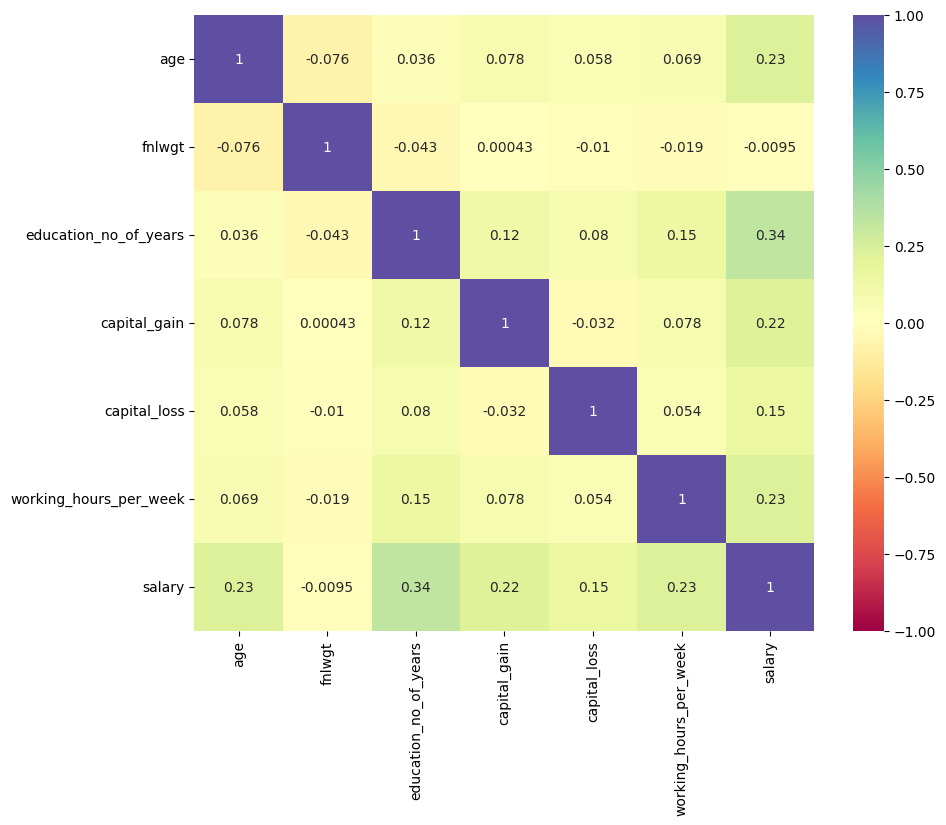

<Figure size 640x480 with 0 Axes>

In [75]:
#let's check the correlation of the following in heatmap
mat_cor = df_copy.mat_cor = df_copy.corr()corr()
plt.figure(figsize = (10, 8))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap ="Spectral")
plt.figure("Heatmap showing correlation of  numeric features and target");

- In the correlation above, the following factor affects income, which includes "age",'no of education years', capital_gain, capital_loss contributed to salary, even though, their contribution is low, but they contributed to the target except for fnlwgt.

### Select Features

In [36]:
from sklearn. model_selection import train_test_split

In [57]:
X = df_copy.drop("salary", axis = 1)
y = df_copy["salary"]

In [58]:
df_copy["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
32532    0
32533    1
32534    0
32535    0
32536    1
Name: salary, Length: 32537, dtype: int32

In [59]:
X.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
dtype: int64

### Convert all categorical variables to numerical variable using One Hot Encoding

In [60]:
X = pd.get_dummies(X, drop_first = True)

#Check
X.head()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [62]:
y_train.value_counts(normalize = True)

0    0.759076
1    0.240924
Name: salary, dtype: float64

In [63]:
y_test.value_counts(normalize = True)

0    0.759066
1    0.240934
Name: salary, dtype: float64

- This shows that the target maintained the same proportion in both training and testing

### Scaling the data

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()
x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

### Model building

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0, max_iter=1000)
log_reg.fit(x_train_sd, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [67]:
#Check Accuracy
log_reg.score(x_train_sd, y_train)

0.851742287448615

In [68]:
log_reg.predict_proba(x_test_sd)

array([[0.16676937, 0.83323063],
       [0.95580855, 0.04419145],
       [0.87663431, 0.12336569],
       ...,
       [0.62663451, 0.37336549],
       [0.98606365, 0.01393635],
       [0.48567416, 0.51432584]])

In [69]:
from sklearn.metrics import (accuracy_score, 
                             recall_score, 
                             precision_score, 
                             f1_score, 
                             confusion_matrix)

In [70]:
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf


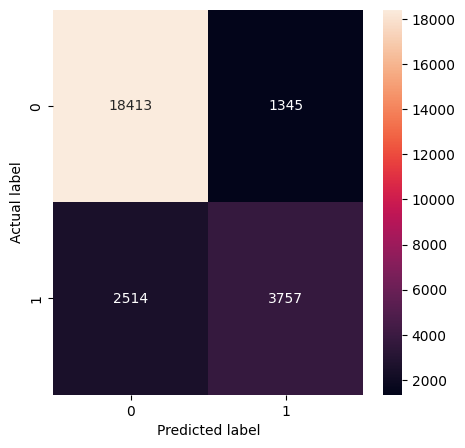

,Accuracy,Recall,Precision,F1-score
0,0.851742,0.599107,0.736378,0.660688


In [72]:
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)
log_reg_train

- The confusion matrix here, shows that 18413 has income less than 50k, while 1345 has income greater than 50k, but predicted that they had less,2514 actually had less but predicted they had more, and 3757 had income greater than 50k

- Accuracy here shows that 85.17% of the data will predict when tested with another data,the recall is 59.9%, precision is 73.63% and F1 is 66.0%